# Quantum Computing Part



1.   Implement a simple quantum operation with Cirq
  *   With 5 qubits
  *   Apply Hadamard operation on every qubit
  *   Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
  *   SWAP (0, 4)
  *   Rotate X with pi/2
  *   Plot the circuit

2.   Create a circuit that is a series of small cirq.Rx rotations and plot the probability of measuring the state in the |0⟩ state. For example, for a qubit, at first, you can rotate 0.1 degree, you get one probability of measuring the state in the |0⟩ state; then you rotate another 0.1 degree in addition, you get another probability; then you another 0.1 degree and so on.

In [1]:
pip install cirq

In [0]:
import numpy as np
import cirq
from cirq.ops import CNOT
import matplotlib.pyplot as plt

In [3]:
circuit = cirq.Circuit()
qubits= cirq.LineQubit.range(5)

circuit.append(cirq.H(q) for q in qubits)

circuit.append(CNOT.on(qubits[i], qubits[i+1]) for i in range(0,4))

circuit.append(cirq.SWAP(qubits[0],qubits[4]))

circuit.append(cirq.rx(np.pi/2).on(i) for i in qubits)

print(circuit)

                                        ┌─────────┐
0: ───H───@──────────────────────────────×────────────Rx(0.5π)───
          │                              │
1: ───H───X───@───Rx(0.5π)───────────────┼───────────────────────
              │                          │
2: ───H───────X───@──────────Rx(0.5π)────┼───────────────────────
                  │                      │
3: ───H───────────X──────────@───────────┼Rx(0.5π)───────────────
                             │           │
4: ───H──────────────────────X───────────×────────────Rx(0.5π)───
                                        └─────────┘


In [0]:
def probability_scores(num_iterations, start_angle = 0, end_angle = 20, shift = 0.1):
  prob = []
  for i in np.arange(start_angle, end_angle, shift):
    circuit = cirq.Circuit()

    qubit = cirq.LineQubit.range(1)

    circuit.append(cirq.rx(i).on(qubit[0]))
    circuit.append(cirq.measure(qubit[0]))
  
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions = num_iterations)

    count = np.count_nonzero(np.array(result.data) == 0)
  
    prob.append(count/num_iterations)

  return prob

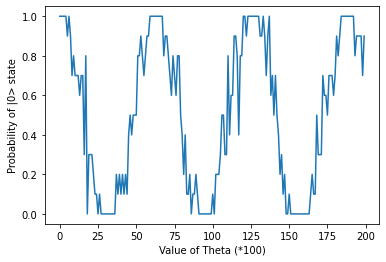

In [16]:
#10 iterations
prob = probability_scores(num_iterations = 10)
plt.plot(prob)
plt.xlabel('Value of Theta (*100)')
plt.ylabel('Probability of |0> state')
plt.show()

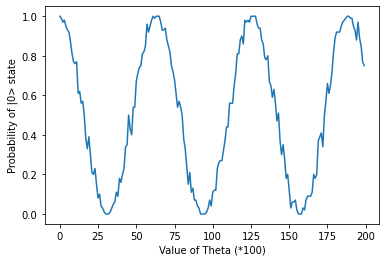

In [17]:
#100 iterations
prob = probability_scores(num_iterations = 100)
plt.plot(prob)
plt.xlabel('Value of Theta (*100)')
plt.ylabel('Probability of |0> state')
plt.show()

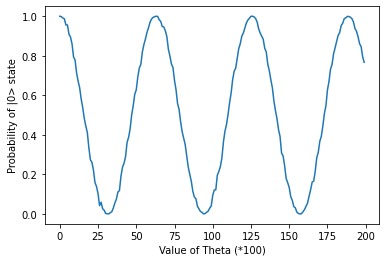

In [18]:
#1000 iterations
prob = probability_scores(num_iterations = 1000)
plt.plot(prob)
plt.xlabel('Value of Theta (*100)')
plt.ylabel('Probability of |0> state')
plt.show()

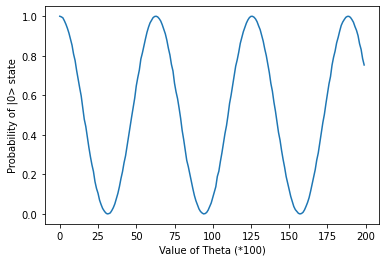

In [19]:
#10000 iterations
prob = probability_scores(num_iterations = 10000)
plt.plot(prob)
plt.xlabel('Value of Theta (*100)')
plt.ylabel('Probability of |0> state')
plt.show()

Clearly, as the number of iterations increase, we obtain a much smoother probability curve